<a href="https://colab.research.google.com/github/Kate5-7-2021/INFO-5502-SU2021/blob/main/INFO_5502_Assign4_Analyze_Income_Gap_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Data and Data Preprocessing**

In [172]:
import pandas as pd                                    #import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import random

In [173]:
df1=pd.read_csv('/content/multipleChoiceResponses.csv', delimiter=',')  #read csv file                                                     
df1

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,Q7_OTHER_TEXT,Q8,Q9,Q10,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q11_Part_6,Q11_Part_7,Q11_OTHER_TEXT,Q12_MULTIPLE_CHOICE,Q12_Part_1_TEXT,Q12_Part_2_TEXT,Q12_Part_3_TEXT,Q12_Part_4_TEXT,Q12_Part_5_TEXT,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,...,Q46,Q47_Part_1,Q47_Part_2,Q47_Part_3,Q47_Part_4,Q47_Part_5,Q47_Part_6,Q47_Part_7,Q47_Part_8,Q47_Part_9,Q47_Part_10,Q47_Part_11,Q47_Part_12,Q47_Part_13,Q47_Part_14,Q47_Part_15,Q47_Part_16,Q48,Q49_Part_1,Q49_Part_2,Q49_Part_3,Q49_Part_4,Q49_Part_5,Q49_Part_6,Q49_Part_7,Q49_Part_8,Q49_Part_9,Q49_Part_10,Q49_Part_11,Q49_Part_12,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,In what industry is your current employer/cont...,How many years of experience do you have in yo...,What is your current yearly compensation (appr...,Does your current employer incorporate machine...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,...,Approximately what percent of your data projec...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,"Do you consider ML models to be ""black boxes"" ...",What tools and methods do you use to make your...,What tools and methods do you use to make your...,What tools and methods do you use to make your...,What tools and methods do you use to make your...,What tools and methods do you use to make your...,What tools and method

In [174]:
df=df1.drop_duplicates()                  #remove duplicate rows
df

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,Q7_OTHER_TEXT,Q8,Q9,Q10,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q11_Part_6,Q11_Part_7,Q11_OTHER_TEXT,Q12_MULTIPLE_CHOICE,Q12_Part_1_TEXT,Q12_Part_2_TEXT,Q12_Part_3_TEXT,Q12_Part_4_TEXT,Q12_Part_5_TEXT,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,...,Q46,Q47_Part_1,Q47_Part_2,Q47_Part_3,Q47_Part_4,Q47_Part_5,Q47_Part_6,Q47_Part_7,Q47_Part_8,Q47_Part_9,Q47_Part_10,Q47_Part_11,Q47_Part_12,Q47_Part_13,Q47_Part_14,Q47_Part_15,Q47_Part_16,Q48,Q49_Part_1,Q49_Part_2,Q49_Part_3,Q49_Part_4,Q49_Part_5,Q49_Part_6,Q49_Part_7,Q49_Part_8,Q49_Part_9,Q49_Part_10,Q49_Part_11,Q49_Part_12,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,In what industry is your current employer/cont...,How many years of experience do you have in yo...,What is your current yearly compensation (appr...,Does your current employer incorporate machine...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,...,Approximately what percent of your data projec...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,"Do you consider ML models to be ""black boxes"" ...",What tools and methods do you use to make your...,What tools and methods do you use to make your...,What tools and methods do you use to make your...,What tools and methods do you use to make your...,What tools and methods do you use to make your...,What tools and method

In [175]:
df=df[['Q1','Q9']]                    #call two columns of the csv file
df

,Q1,Q9
0,What is your gender? - Selected Choice,What is your current yearly compensation (appr...
1,Female,NaN
2,Male,"10-20,000"
3,Female,"0-10,000"
4,Male,NaN
...,...,...
23855,Male,"250-300,000"
23856,Female,NaN
23857,Male,"10-20,000"
23858,Male,NaN


In [176]:
df=df.rename(columns={'Q1':'Gender','Q9':'Compensation_range'})             #rename columns
df

,Gender,Compensation_range
0,What is your gender? - Selected Choice,What is your current yearly compensation (appr...
1,Female,NaN
2,Male,"10-20,000"
3,Female,"0-10,000"
4,Male,NaN
...,...,...
23855,Male,"250-300,000"
23856,Female,NaN
23857,Male,"10-20,000"
23858,Male,NaN


In [177]:
df=df.iloc[1:, :]                #drop the first row with all questions
df

,Gender,Compensation_range
1,Female,NaN
2,Male,"10-20,000"
3,Female,"0-10,000"
4,Male,NaN
5,Male,"0-10,000"
...,...,...
23855,Male,"250-300,000"
23856,Female,NaN
23857,Male,"10-20,000"
23858,Male,NaN


In [178]:
df=df.dropna()                 #drop rows include NaN
df

,Gender,Compensation_range
2,Male,"10-20,000"
3,Female,"0-10,000"
5,Male,"0-10,000"
6,Male,I do not wish to disclose my approximate yearl...
7,Male,"10-20,000"
...,...,...
23848,Male,I do not wish to disclose my approximate yearl...
23850,Female,I do not wish to disclose my approximate yearl...
23854,Male,"10-20,000"
23855,Male,"250-300,000"


In [179]:
#drop the rows include the string in the compensation column
df=df[df['Compensation_range'].str.contains('I do not wish to disclose my approximate yearly compensation')==False]
df

,Gender,Compensation_range
2,Male,"10-20,000"
3,Female,"0-10,000"
5,Male,"0-10,000"
7,Male,"10-20,000"
8,Male,"0-10,000"
...,...,...
23844,Male,"90-100,000"
23845,Male,"0-10,000"
23854,Male,"10-20,000"
23855,Male,"250-300,000"


In [180]:
df=df.reset_index(drop=True)              #reset the index and replace the old index
df

,Gender,Compensation_range
0,Male,"10-20,000"
1,Female,"0-10,000"
2,Male,"0-10,000"
3,Male,"10-20,000"
4,Male,"0-10,000"
...,...,...
15424,Male,"90-100,000"
15425,Male,"0-10,000"
15426,Male,"10-20,000"
15427,Male,"250-300,000"


In [182]:
print(df['Compensation_range'].unique())          #print compensation range value

['10-20,000' '0-10,000' '20-30,000' '125-150,000' '30-40,000' '50-60,000'
 '100-125,000' '90-100,000' '70-80,000' '80-90,000' '60-70,000'
 '400-500,000' '40-50,000' '150-200,000' '500,000+' '300-400,000'
 '200-250,000' '250-300,000']


In [183]:
#create the dictionary from the compensation range, assign the avarage value to each and store them in new column
dic = {'0-10,000': 5000, '10-20,000': 15000, '20-30,000': 25000, '30-40,000': 35000,         
       '40-50,000': 45000, '50-60,000': 55000, '60-70,000': 65000, '70-80,000': 75000, 
       '80-90,000': 85000, '90-100,000': 95000, '100-125,000': 112500, 
       '125-150,000': 137500, '150-200,000': 175000, '200-250,000': 225000, 
       '250-300,000': 275000, '300-400,000': 350000, '400-500,000': 450000, 
       '500,000+':500000}
df['compensation'] = df['Compensation_range'].apply(lambda x: dic[x])
df

,Gender,Compensation_range,compensation
0,Male,"10-20,000",15000
1,Female,"0-10,000",5000
2,Male,"0-10,000",5000
3,Male,"10-20,000",15000
4,Male,"0-10,000",5000
...,...,...,...
15424,Male,"90-100,000",95000
15425,Male,"0-10,000",5000
15426,Male,"10-20,000",15000
15427,Male,"250-300,000",275000


In [184]:
df.dtypes

Gender                object
Compensation_range    object
compensation           int64
dtype: object

In [185]:
df2=df['Gender'].value_counts()
df2                  #count the number of each gender or get the percentage
#df['Gender'].value_counts(normalize=True)

Male                       12866
Female                      2380
Prefer not to say            130
Prefer to self-describe       53
Name: Gender, dtype: int64

1.	Calculate the median income of male employees and the median income of female employee in the population.

In [186]:
df.median()              #get the median from the rest of the salaries regardless of gender


compensation    25000.0
dtype: float64

In [187]:
df3=df.groupby(['Gender'])['compensation'].median()
df3                           #median for each gender compensation

Gender
Female                     25000
Male                       35000
Prefer not to say          45000
Prefer to self-describe    45000
Name: compensation, dtype: int64

In [188]:
pop_female_median=df3.groupby(['Gender']).get_group('Female')
pop_female_median

Gender
Female    25000
Name: compensation, dtype: int64

In [189]:
pop_male_median=df3.groupby(['Gender']).get_group('Male')
pop_male_median

Gender
Male    35000
Name: compensation, dtype: int64

In [23]:
#df.groupby(['Gender']).get_group('Male')

In [190]:
df4=df.groupby(['Gender'])['compensation'].sum()
df4

Gender
Female                     106222500
Male                       658620000
Prefer not to say           10615000
Prefer to self-describe      6012500
Name: compensation, dtype: int64

In [191]:
#df5=df.groupby(['Gender'])['compensation'].value_counts()
df5=df.groupby(['Gender'])['compensation'].agg(['value_counts'])
df5

value_counts
Gender                  compensation              
Female                  5000                   753
                        15000                  293
                        25000                  199
                        35000                  176
                        45000                  158
...                                            ...
Prefer to self-describe 55000                    1
                        137500                   1
                        175000                   1
                        225000                   1
                        275000                   1

[66 rows x 1 columns]

In [192]:
#df6=df.groupby(['Gender'])['compensation'].value_counts().loc['Female']
value_counts_female=df.groupby(['Gender'])['compensation'].agg(['value_counts']).loc['Female']
value_counts_female

,value_counts
compensation,
5000,753
15000,293
25000,199
35000,176
45000,158
55000,150
112500,118
65000,102
85000,101


In [193]:
value_counts_percent_female=df.groupby(['Gender'])['compensation'].value_counts(normalize=True).loc['Female']
value_counts_percent_female

compensation
5000      0.316387
15000     0.123109
25000     0.083613
35000     0.073950
45000     0.066387
55000     0.063025
112500    0.049580
65000     0.042857
85000     0.042437
75000     0.038235
137500    0.036555
95000     0.034454
175000    0.019328
500000    0.003361
275000    0.002941
225000    0.002101
350000    0.001681
Name: compensation, dtype: float64

In [196]:
female_df1=pd.concat([value_counts_female,value_counts_percent_female], axis='columns', sort=False)
female_df=female_df1.rename(columns={'compensation':'count_percentage'})
female_df


,value_counts,count_percentage
compensation,,
5000,753,0.316387
15000,293,0.123109
25000,199,0.083613
35000,176,0.073950
45000,158,0.066387
55000,150,0.063025
112500,118,0.049580
65000,102,0.042857
85000,101,0.042437


In [197]:
#df8=df.groupby(['Gender'])['compensation'].value_counts().loc['Male']
value_counts_male=df.groupby(['Gender'])['compensation'].agg(['value_counts']).loc['Male']
value_counts_male

,value_counts
compensation,
5000,3610
15000,1616
25000,1181
35000,933
45000,792
55000,758
112500,713
65000,621
75000,582


2.	Draw an overlaid graph to show the histograms of the incomes of female and male employees in the population. (You create one histogram for male, and another histogram for female, but the two histograms will be displayed in the same graph with different colors)

In [198]:
#get the compensation list for all genders
df7=df.groupby(['Gender'])['compensation'].apply(list)
df7

Gender
Female                     [5000, 15000, 55000, 5000, 85000, 15000, 15000...
Male                       [15000, 5000, 15000, 5000, 25000, 137500, 3500...
Prefer not to say          [5000, 5000, 500000, 55000, 15000, 55000, 1125...
Prefer to self-describe    [65000, 25000, 95000, 112500, 500000, 25000, 5...
Name: compensation, dtype: object

In [ ]:

female_compensation=df.groupby(['Gender'])['compensation'].apply(list).loc['Female']
female_compensation

In [ ]:
male_compensation=df.groupby(['Gender'])['compensation'].apply(list).loc['Male']
male_compensation

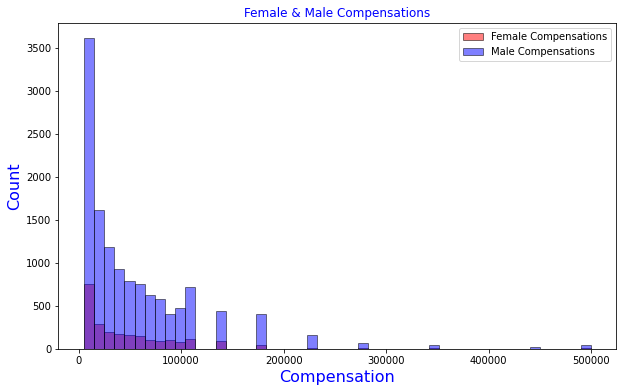

In [201]:
#define the function include label for each histogram 
plt.figure(figsize=(10,6))
plt.hist(female_compensation,bins=50, alpha=0.5,label='Female Compensations',color='r')
plt.hist(male_compensation,bins=50, alpha=0.5,label='Male Compensations',color='b')
#customize the plot
plt.xlabel('Compensation',size=16, color='b')
plt.ylabel('Count',size=16, color='b')
plt.title('Female & Male Compensations', color='b')
plt.legend(loc='upper right')

3.	Use the random sampling, empirical distribution, sample comparison, bootstrap, hypothesis testing as well as A/B testing we discussed in the class to analyze the income gap between female and male employees.

•	Select a sample from the population. Make sure your sample include 500 employees selected from the population, and consider how to ensure the sampling strategy is fair since the datasets include overwhelmed male employees than female employees 

In [ ]:
csv_df=df.to_csv()
print(csv_df)

In [ ]:
compensation_list=df['compensation'].to_list() #convert compensation column to list
compensation_list

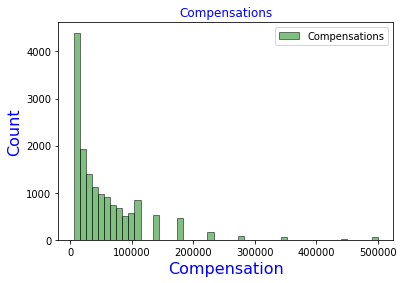

In [204]:
#get the histogram from the rest of the population
plt.hist(compensation_list,bins=50, alpha=0.5,label='Compensations',color='g')
plt.xlabel('Compensation',size=16, color='b')
plt.ylabel('Count',size=16, color='b')
plt.title('Compensations', color='b')
plt.legend(loc='upper right')

#df.his('compensation', bins=np.arrange(0,5000001,10000))

In [ ]:
#random sampling without repetition
random_sampling_wo=random.sample(compensation_list, 500)
random_sampling_wo

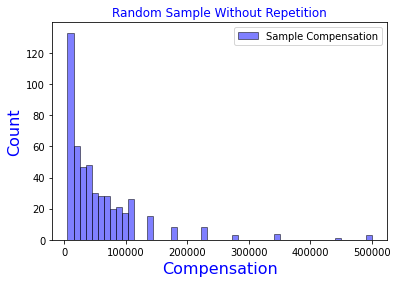

In [206]:
#histogram of the sample without repetition
plt.hist(random_sampling_wo,bins=50, alpha=0.5,label='Sample Compensation',color='b')
plt.xlabel('Compensation',size=16, color='b')
plt.ylabel('Count',size=16, color='b')
plt.title('Random Sample Without Repetition', color='b')
plt.legend(loc='upper right')

In [207]:
rand_sample_500=df.sample(n=500, random_state=0)
print(rand_sample_500)

      Gender Compensation_range  compensation
8206    Male          10-20,000         15000
1308    Male          50-60,000         55000
2247    Male          60-70,000         65000
6722    Male          10-20,000         15000
5682    Male        100-125,000        112500
...      ...                ...           ...
12934   Male           0-10,000          5000
4827    Male          30-40,000         35000
14417   Male          10-20,000         15000
7945    Male          70-80,000         75000
8114    Male        125-150,000        137500

[500 rows x 3 columns]


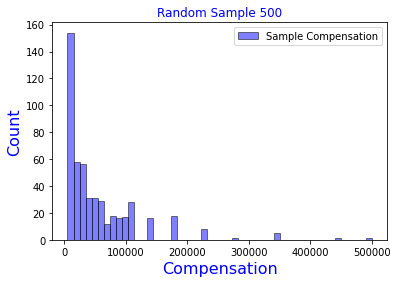

In [209]:
#histogram of the sample without repetition
plt.hist(rand_sample_500['compensation'],bins=50, alpha=0.5,label='Sample Compensation', color='b')
plt.xlabel('Compensation',size=16, color='b')
plt.ylabel('Count',size=16, color='b')
plt.title('Random Sample 500', color='b')
plt.legend(loc='upper right')

In [210]:
rand_sample_2000=df.sample(n=2000, random_state=0)

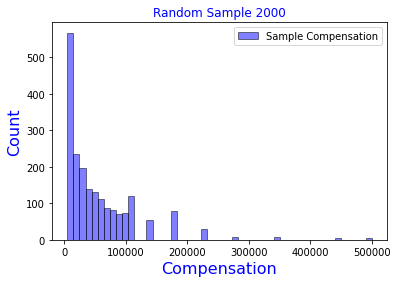

In [211]:
#histogram of the sample without repetition
plt.hist(rand_sample_2000['compensation'],bins=50, alpha=0.5,label='Sample Compensation',color='b')
plt.xlabel('Compensation',size=16, color='b')
plt.ylabel('Count',size=16, color='b')
plt.title('Random Sample 2000', color='b')
plt.legend(loc='upper right')

In [212]:
! pip install dc_stat_think

In [213]:
#ECDF plotting & percentile computation
import seaborn as sns
import dc_stat_think as dcst

In [214]:
comp=df.compensation

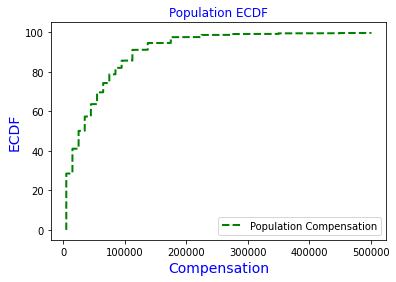

In [215]:
#define x & y
x, y = dcst.ecdf(comp)
#draw the ECDF plot
plt.plot(x, y*100, linestyle='--', lw = 2,label='Population Compensation',color='g')
plt.xlabel('Compensation', size = 14, color='b')
plt.ylabel('ECDF', size = 14, color='b')
plt.title('Population ECDF', color='b')
plt.legend(loc='lower right')
plt.show()


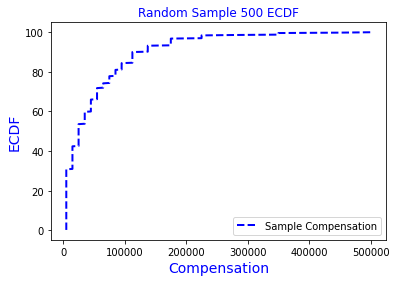

In [216]:
comp_rand=rand_sample_500.compensation
x1, y1 = dcst.ecdf(comp_rand)
plt.plot(x1, y1*100, linestyle='--', lw = 2,label='Sample Compensation',color='b')
plt.xlabel('Compensation', size = 14, color='b')
plt.ylabel('ECDF', size = 14, color='b')
plt.title('Random Sample 500 ECDF', color='b')
plt.legend(loc='lower right')
plt.show()


In [218]:
from datascience import *

In [219]:
#create the table of the dataframe

compensation_table=Table().with_columns(
    'Gender',df['Gender'].to_numpy(),
    'compensation',df['compensation'].to_numpy()
)
compensation_table

Gender,compensation
Male,15000
Female,5000
Male,5000
Male,15000
Male,5000
Male,25000
Male,137500
Male,35000
Male,35000
Female,15000


In [220]:
compensation_table.column('compensation').min()

5000

In [221]:
compensation_table.column('compensation').max()

500000

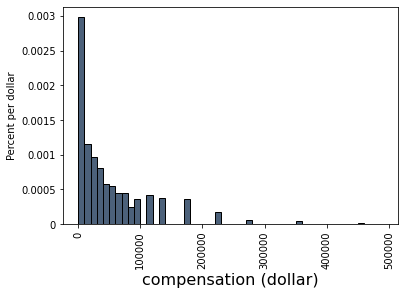

In [222]:
#Empirical Distribution of the sample size of 500 from the population
def empirical_hist_compensation(n):
  #compensation_table.sample(n).hist('compensation',bins=np.append(np.arange(0,500000,10000)),unit='dollar')
  compensation_table.sample(n).hist('compensation',bins=np.arange(0,500000,10000),unit='dollar')
empirical_hist_compensation(500)


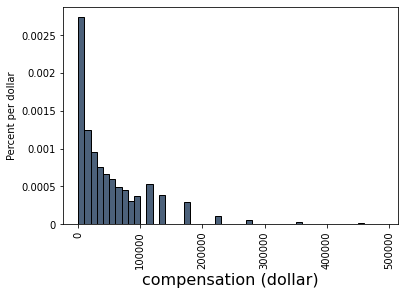

In [223]:
#Empirical Distribution of the almost 30% of the population
def empirical_hist_compensation(n):
  #compensation_table.sample(n).hist('compensation',bins=np.append(np.arange(0,500000,10000)),unit='dollar')
  compensation_table.sample(n).hist('compensation',bins=np.arange(0,500000,10000),unit='dollar')
empirical_hist_compensation(5000)


In [230]:
random_sample1 = compensation_table.sample(500, with_replacement=False)
random_sample1

Gender,compensation
Male,25000
Female,5000
Male,95000
Male,95000
Male,5000
Male,45000
Male,45000
Male,5000
Male,5000
Male,5000


•	Draw the income histogram for the sample, calculate the median income of the sample, and draw a red dot and a yellow dot of the female median income and male median income of the population, respectively, in the histogram.

In [231]:
random_sample2=random_sample1.where('Gender', are.equal_to('Female'))
random_sample2

Gender,compensation
Female,5000
Female,5000
Female,5000
Female,85000
Female,5000
Female,25000
Female,75000
Female,55000
Female,55000
Female,35000


In [232]:
sample_median=percentile(50,random_sample1.column('compensation'))
sample_median

25000

In [233]:
female_median=percentile(50,random_sample2.column('compensation'))
female_median

15000

In [234]:
random_sample3=random_sample1.where('Gender', are.equal_to('Male'))
male_median=percentile(50,random_sample3.column('compensation'))
male_median

35000

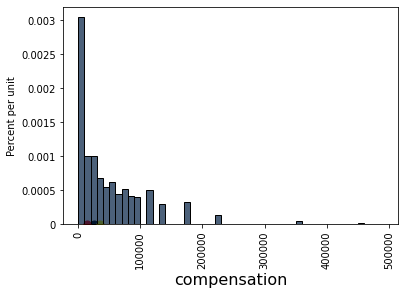

In [239]:
import matplotlib.pyplot as plots
random_bins = np.arange(0, 500000, 10000)
random_sample1.select('compensation',).hist(bins=random_bins)
plots.scatter(sample_median, 0, color='black', s=50)
plots.scatter(female_median, 0, color='r', s=50)
plots.scatter(male_median, 0, color='yellow', s=50)

•	Draw the histogram of the test statistic of the sample, and draw a red dot to show the corresponding test statistic of the population (e.g. the difference of the median incomes between female and male employees)

In [240]:
compensation_median=compensation_table.group('Gender',np.median)
compensation_median.show()                                        

Gender,compensation median
Female,25000
Male,35000
Prefer not to say,45000
Prefer to self-describe,45000


In [241]:
compensation_table.group('Gender')

Gender,count
Female,2380
Male,12866
Prefer not to say,130
Prefer to self-describe,53


In [242]:
compensation_averages=compensation_table.group('Gender',np.average)
compensation_averages.show()

Gender,compensation average
Female,44631.3
Male,51190.7
Prefer not to say,81653.8
Prefer to self-describe,113443


In [124]:
#random_sample= compensation_only.sample(500, with_replacement=False)
#random_sample

In [243]:
compensation_only=compensation_table.drop('Gender')
compensation_only

compensation
15000
5000
5000
15000
5000
25000
137500
35000
35000
15000


In [244]:
compensation_only1=random_sample1.drop('Gender')
compensation_only1

compensation
25000
5000
95000
95000
5000
45000
45000
5000
5000
5000


In [245]:
random_sample_median=percentile(50,random_sample1.column('compensation'))
random_sample_median

25000

In [246]:
np.average(compensation_only.column('compensation'))

50649.42640482209

In [247]:
np.average(compensation_only1.column('compensation'))

49670.0

In [249]:
def sub(num1,num2):
    return(num1-num2)
print(sub(35000,25000))


10000


In [251]:
def random_sample_average():
  random_sample1=compensation_only.sample(500,with_replacement=False)
  return np.average(random_sample1.column('compensation'))
  #return percentile(50,random_sample.column('compensation'))

In [254]:
sample_averages = make_array()

repetitions = 10000
for i in np.arange(repetitions):
    sample_averages = np.append(sample_averages, random_sample_average())

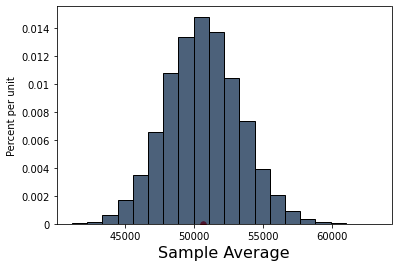

In [255]:
averages_tbl = Table().with_column('Sample Average', sample_averages)
averages_tbl.hist(bins=20)

observed_statistic = 50649.42640482209 
plots.scatter(observed_statistic, 0, color='red', s=30);


In [256]:
#conventional cut-offs and P-value
np.count_nonzero(sample_averages <= observed_statistic) / repetitions

0.5061

•	Write a procedure to use bootstrap to produce at least 5000 samples.

• Draw the histogram of the test statistic of the bootstrap samples.

• Define confidence interval and P-value to validate the hypothesis you defined.

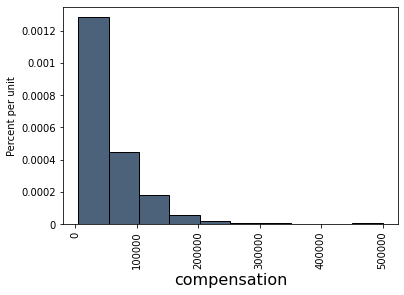

In [257]:
#get basic idea of the distribution of the population compensation
#the next two steps have already completed in the previous parts as well 
compensation_table.select('compensation').hist()

In [258]:
#np.mean(compensation_table.column('compensation'))

In [272]:
#can use the boot strap for mean, median and the population proportion
#to use either mean or median replace the name of them in the code with corresponding need
#as the null hypothesis is about average, so the bootstrap of the mean is alpplied here.
def bootstrap_means(random_sample1,label, replications):
    just_one_column = random_sample1.select(label)
    #medians = make_array()
    mean = make_array()
    for i in np.arange(replications):
        bootstrap_sample = just_one_column.sample()
        #resampled_mean = percentile(50, bootstrap_sample.column(0))
        resampled_mean = np.mean(bootstrap_sample.column(0))
        #medians = np.append(medians, resampled_median)
        means = np.append(means, resampled_mean)
    #return medians
    return means

In [275]:
#bstrap_median= bootstrap_median(compensation_table,'Compensation', 5000)
bstrap_mean = bootstrap_means(compensation_table, 'compensation', 5000)

In [168]:
#define the end point of the confidence interval, in this case is 95% confidence interval
#remaining of 95 out of 100 is five, which divided by two for the two end points.
left = percentile(2.5, bstrap_means)
#left = percentile(2.5, bstrap_medians)
left

In [ ]:
#right = percentile(97.5, bstrap_medians)
right = percentile(97.5, bstrap_means)
right

In [ ]:
make_array(left,right)

In [ ]:
#resampled_medians = Table().with_column('Bootstrap Sample Median', bstrap_medians)
resampled_means = Table().with_column('Bootstrap Sample Mean', bstrap_means)
#median_bins=np.arange(100000, 130000, 2500)
#resampled_medians.hist(bins = median_bins)
mean_bins=20
resampled_means.hist(bins=mean_bins)
plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=3, zorder=1)
plots.scatter(pop_median, 0, color='red', s=30, zorder=2);
plots.scatter(pop_mean, 0, color='red', s=30, zorder=2);